## HW#2 Supervised Learning I

In this assignment, you are going to practice supervised learning ML modelings. 

**DUE: 10/12/2020 Thursday 11:59 PM.**

# Avaneesh Kolluri
**I pledge my honor that I have abided by the Stevens Honor System.**

### Problem #1 Linear Regression (20 pts)
Data: Bike Sharing Dataset

#### Data Set
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

#### Files
- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

#### Dataset Characteristics:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
#### Task
- Predict the count of total rental bikes including both casual and registered.
- Test Set: Daily Basis - August, Hourly Basis - Summer Season (June, July, and August from 10 AM to 2 PM)

In [1]:
import pandas as pd

In [2]:
days = pd.read_csv("day.csv")
#days = days.drop(columns = ['instant','dteday', 'casual', 'registered'])
hours = pd.read_csv("hour.csv")
#hours = hours.drop(columns = ['instant','dteday', 'casual', 'registered'])
#hours 10-14
#hours.loc[hours['cnt'] == "NaN"]

a) (2 pts) Split the datasets into train and test sets. (do for both)

In [3]:
daily_train_x = days.loc[days['mnth'] != 8].drop(columns = ['cnt'])
daily_train_y = days.loc[days['mnth'] != 8]['cnt']
daily_test_x = days.loc[days['mnth'] == 8].drop(columns = ['cnt'])
daily_test_y = days.loc[days['mnth'] == 8]['cnt']
#and hours['hr'] < 10 and hours['hr']>2
# hours.loc[(hours['season'] != 2)].loc[days['mnth'] >= 6].loc[days['mnth'] >= 6].loc[hours['hr'] != 10].loc[hours['hr'] != 11].loc[hours['hr'] != 12].loc[hours['hr'] != 13]
df1 = hours[(hours['season'] == 2) & ((hours['mnth'] < 6) | (hours['mnth'] > 8)) & ((hours['hr'] < 10) | (hours['hr'] >= 14))]
df2 = hours[(hours['season'] != 2)]
#df1 = hrly_train_x.append(df2)
df1 = pd.concat([df1, df2], ignore_index = False)
hrly_train_x = df1.drop(columns = ['cnt'])
hrly_train_y = df1['cnt']
df3 = hours[(hours['season'] == 2) & ((hours['mnth'] >= 6) & (hours['mnth'] <= 8)) & ((hours['hr'] >= 10) & (hours['hr'] < 14))]
hrly_test_x = df3.drop(columns = ['cnt'])
hrly_test_y = df3['cnt']

biggerday = daily_train_x
biggerHr = hrly_train_x

b) (2 pts) Before you do anything with the train datasets, which features can be deleted? Explain why. (do for both)

The index, date, and casual and registered riders can be deleted. Index can be deleted because the index is irrelevent to decide the rental bikers. The date is also irrelevent because you do not want to overfit the data, and we already have to month parameter to give us a relavent time in relation to bikers. Casual and registered parameters are irrelevent as we want the sum, which the cnt column gives us. 

In [4]:
daily_train_x = daily_train_x.drop(columns = ['instant','dteday', 'casual', 'registered'])
daily_test_x = daily_test_x.drop(columns = ['instant','dteday', 'casual', 'registered'])
hrly_train_x = hrly_train_x.drop(columns = ['instant','dteday', 'casual', 'registered'])
hrly_test_x = hrly_test_x.drop(columns = ['instant','dteday', 'casual', 'registered'])

c) (2 pts) Make `weathersit` and `weekday` one-hot vectors. (do for both)
- Do you think this process is necessary? Do you find other features that are necessary to do this? Explain why. If you find any features that are needed to be tranformed into one-hot vectors, please do. 
- **Do not** do on the test sets here as well as step d).  

I actually tried looking at the accuracy of my models with and without incorporating one-hot vectors, and they did make a difference but very slightly, as they allow categorical variables to be more expressive. I also feel like season could be transformed into a one hot vector that would help my model be more accurate. However, after trying to encorporate season, the R^2 value of my models went closer to 0, and the RSME values increased, so I chose not to include the Season variable using hot-encoded vectors.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = LabelEncoder()

df_daily_weather = daily_train_x['weathersit']
df_daily_weather = encoder.fit_transform(df_daily_weather)

df_hourly_weather = hrly_train_x['weathersit']
df_hourly_weather = encoder.fit_transform(df_hourly_weather)

In [6]:
encoder = LabelEncoder()

df_daily_weekday = daily_train_x['weekday']
df_daily_weekday = encoder.fit_transform(df_daily_weekday)

df_hourly_weekday = hrly_train_x['weekday']
df_hourly_weekday = encoder.fit_transform(df_hourly_weekday)

In [7]:
### For Test Value ###
encoder = LabelEncoder()
test_daily_weekday = daily_test_x['weekday']
test_daily_weekday = encoder.fit_transform(test_daily_weekday)

test_hourly_weekday = hrly_test_x['weekday']
test_hourly_weekday = encoder.fit_transform(test_hourly_weekday)

In [8]:
## Still for Test ##
encoder = LabelEncoder()
test_daily_weather = daily_test_x['weathersit']
test_daily_weather = encoder.fit_transform(test_daily_weather)

test_hourly_weather = hrly_test_x['weathersit']
test_hourly_weather = encoder.fit_transform(test_hourly_weather)

In [9]:
## Still for Test ##
encoder_weather = OneHotEncoder()
test_weather_encoded_day_1hot = encoder_weather.fit_transform(test_daily_weekday.reshape(-1,1))
test_weather_encoded_hour_1hot = encoder_weather.fit_transform(test_hourly_weekday.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [10]:
## Still for Test ##
encoder3 = OneHotEncoder()
test_weekday_encoded_day_1hot = encoder3.fit_transform(test_daily_weekday.reshape(-1,1))
test_weekday_encoded_hour_1hot = encoder3.fit_transform(test_hourly_weekday.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [11]:
encoder_weather = OneHotEncoder()

df_weather_encoded_day_1hot = encoder_weather.fit_transform(df_daily_weather.reshape(-1,1))

df_weather_encoded_hour_1hot = encoder_weather.fit_transform(df_hourly_weather.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [12]:
encoder3 = OneHotEncoder()

df_weekday_encoded_day_1hot = encoder3.fit_transform(df_daily_weekday.reshape(-1,1))
df_weekday_encoded_hour_1hot = encoder3.fit_transform(df_hourly_weekday.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [13]:
#print(df_weather_encoded_day_1hot.toarray())
#print(len(df_weather_encoded_hour_1hot.toarray()))
#print(len(df_weekday_encoded_day_1hot.toarray()))
#print(len(df_weekday_encoded_hour_1hot.toarray()))

daily_train_x['weathersit'] = df_weather_encoded_day_1hot.toarray()
hrly_train_x['weathersit'] = df_weather_encoded_hour_1hot.toarray()
daily_train_x['weekday'] = df_weekday_encoded_day_1hot.toarray()
hrly_train_x['weekday'] = df_weekday_encoded_hour_1hot.toarray()
#days['weathersit'] = df_weather_encoded_day_1hot.toarray()


# For Test DF's
daily_test_x['weathersit'] = test_weather_encoded_day_1hot.toarray()
daily_test_x['weekday'] = test_weekday_encoded_day_1hot.toarray()

hrly_test_x['weathersit'] = test_weather_encoded_hour_1hot.toarray()
hrly_test_x['weekday'] = test_weekday_encoded_hour_1hot.toarray()

#biggerHr['weathersit'] = df_weather_encoded_hour_1hot.toarray()
#biggerHr['weekday'] = df_weekday_encoded_hour_1hot.toarray()

## Finish This ##

d) (2 pts) Using the train sets, find the correlation between coorelations between features and target variable. 
   - Did you find other features that can be deleted? Explain why. 

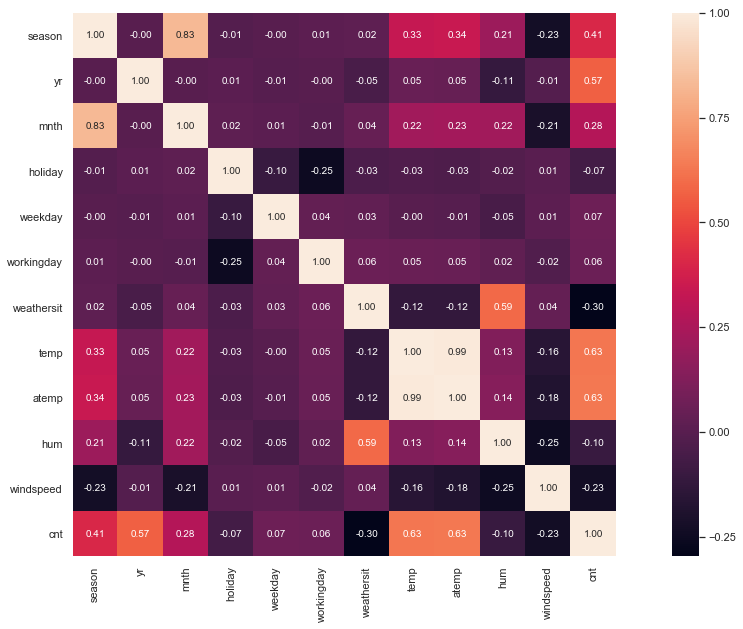

In [15]:
### Code Starts Here ###

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols_day=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']
cm=np.corrcoef(days[cols_day].values.T)
cm
sns.set(font_scale=1)
plt.figure(figsize = (20,10))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols_day,xticklabels=cols_day)
plt.show()

In [19]:
cm[0][1]

-0.001844342562410328

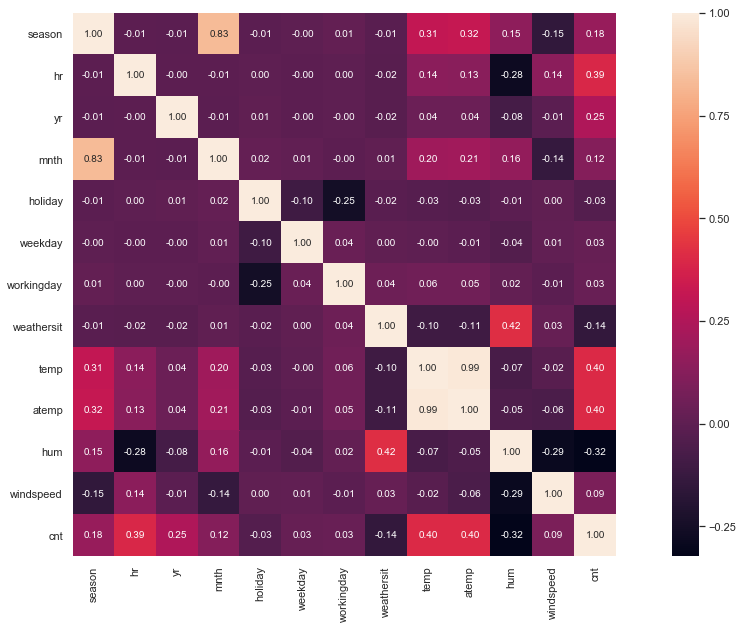

In [30]:
cols_day=['season','hr','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']
cm=np.corrcoef(hours[cols_day].values.T)
cm
sns.set(font_scale=1)
plt.figure(figsize = (20,10))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols_day,xticklabels=cols_day)
plt.show()

For Daily, I think we can get rid of holiday, weekday, and humidity. For Hourly, we can get rid of holiday, weekday workingday, and windspeed. This is due to their almost zero correclations for both graphs, and although others may have low correlations, they are not as close to zero, so we may need them in order to not overfit our classificatiopn model.

In [31]:
daily_train_x = daily_train_x.drop(columns = ['holiday', 'weekday','workingday','hum'])
hrly_train_x = hrly_train_x.drop(columns = ['holiday', 'weekday','workingday','windspeed'])

e) (1 pts) Do you think you need to do cross-validation? What is the advantage and disadvantage of doing it?

I think we may need to do cross validation because  there are a lot of variables that could contribute to the total number of bikers, and we do not want to over fit our model, the advantage of doing it would be that it could show us how our model performs on test data, as if we had to split it ourselves like we did here, we do not have enough data to train a fully accurate model, but the disadvantage would be the computation time.

f) (7 pts) Using `LinearRegression` from `sklearn` and `polyfit` from `numpy`, train two models each by having all features and 5 features based on step a) thru d). You might have to train polynomial model multiple times and you may go back do futher feature engineerings. **If you do, please show all work. Do not erase any work.** (do for both)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
# for daily sklearn
from sklearn.linear_model import LinearRegression
y = days['cnt']
tempdf = days.drop(columns = ['cnt','dteday','casual','registered']).reset_index().drop(columns = ['index'])

poly = PolynomialFeatures(degree=2)
tempdf = poly.fit_transform(tempdf)

d_all_model = LinearRegression()
d_all_model.fit(tempdf, y)
yallday_train_pred=d_all_model.predict(tempdf)

In [34]:
from sklearn.linear_model import LinearRegression
daily5df = daily_train_x.drop(columns = ['mnth','atemp']).reset_index().drop(columns = ['index'])

poly = PolynomialFeatures(degree=2)
daily5df = poly.fit_transform(daily5df)

y = daily_train_y
d_5_model = LinearRegression()
d_5_model.fit(daily5df, y)
y5day_train_pred=d_5_model.predict(daily5df)

In [35]:
# for hourly sklearn
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression
y = hours['cnt']
tempdfh = hours.drop(columns = ['cnt','dteday','casual','registered']).reset_index().drop(columns = ['index'])

poly = PolynomialFeatures(degree=2)
tempdfh = poly.fit_transform(tempdfh)

hr_all_model = LinearRegression()
hr_all_model.fit(tempdfh, y)
yallhr_train_pred=hr_all_model.predict(tempdfh)

In [36]:
from sklearn.linear_model import LinearRegression
hrly5df = hrly_train_x.drop(columns = ['yr','weathersit','atemp']).reset_index().drop(columns = ['index'])
y = hrly_train_y

poly = PolynomialFeatures(degree=2)
hrly5df = poly.fit_transform(hrly5df)

hr_5_model = LinearRegression()
hr_5_model.fit(hrly5df, y)
y5hr_train_pred=hr_5_model.predict(hrly5df)

g) (2 pts) Report value of coefficent ${\bf w}$, **RMSE**, and **$R^2$** of all models. Which model is the best? Explain why. (asnwer for both data sets)

I also chose to use the model that only included 5 attributes of the "day" dataframe as it had the second highest r^2 value (behind the model that included all values for the day dataframe), and even though it had a higher RMSE than the model that included all values for days, I chose this one because I felt that this one would not have a problem with overfitting. The model that was trained with all the attributes of day, I felt like was too much and would overfit the model. I also chose this model as it was better performing than the other models. This can be seen after running the cell below.

In [37]:
### Code Starts Here ###
# mean squared error and take the sqare root
# w: model = slr.fit, then model.coeff
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *

# for all days
print('R^2 train for all days: %.3f' %(r2_score(days['cnt'],yallday_train_pred)))
print('RMSE train for all days: %.3f' %(sqrt(mean_squared_error(days['cnt'],yallday_train_pred))))
print('Coefficients for train for all days: ' + (str(d_all_model.coef_)))

# for 5 parameter for days
print('R^2 train for 5 parameters for days: %.3f' %(r2_score(daily_train_y,y5day_train_pred)))
print('RMSE train for 5 parameters for days: %.3f' %(sqrt(mean_squared_error(daily_train_y,y5day_train_pred))))
print('Coefficients for train for 5 parameters for days: ' + (str(d_5_model.coef_)))

# for all hours
print('R^2 train for all hours: %.3f' %(r2_score(hours['cnt'],yallhr_train_pred)))
print('RMSE train for all hours: %.3f' %(sqrt(mean_squared_error(hours['cnt'],yallhr_train_pred))))
print('Coefficients for train for all hours: ' + (str(hr_all_model.coef_)))

# for 5 parameter for hours
print('R^2 train for 5 parameters for hours: %.3f' %(r2_score(hrly_train_y,y5hr_train_pred)))
print('RMSE train for 5 parameters for hours: %.3f' %(sqrt(mean_squared_error(hrly_train_y,y5hr_train_pred))))
print('Coefficients for train for 5 parameters for hours: ' + (str(hr_5_model.coef_)))

R^2 train for all days: 0.879
RMSE train for all days: 674.686
Coefficients for train for all days: [-5.05110120e+11 -3.74417928e+01  1.17718637e+03 -4.60819188e+04
  9.67762603e+02 -5.31669604e+02 -5.61242195e+00  1.65033449e+02
 -8.37558213e+01  1.16922932e+05 -1.12887949e+05  1.25180605e+04
 -6.57911050e+03 -8.12159838e-01  5.40098191e+00  5.91255894e+02
  4.28685570e+01 -5.58709300e+01  1.61534508e+00 -7.25907223e+00
 -7.80841380e+00  4.46951701e+02 -4.60802267e+02  7.13766560e+01
  2.87828632e+01  7.74773871e+01 -1.76957843e+03 -2.23460166e+02
  6.48752259e+02  3.77030072e+01 -1.62658702e+01 -1.96374364e+02
 -4.74775168e+03  3.46057631e+03  4.02726338e+01 -5.65033730e+02
 -4.60819187e+04 -1.56240103e+04  1.93193408e+04 -5.65841145e+02
  2.74713805e+03  2.81301170e+03 -1.69470701e+05  1.77058193e+05
 -2.77905542e+04 -1.17853906e+04 -5.60894405e+02  1.39664542e+03
 -5.65366221e+01  2.39264214e+02  3.30475215e+02 -1.60765491e+04
  1.73324536e+04 -2.52448447e+03 -2.66312406e+02 -5.316

h) (2 pts) Using the best model out of 4 models, evaluate the model using the test sets. Can you use a model from daily data to hourly test set? Explain why or why not. 

You cannot use a model from daily data to an hourly test set because each set of data would have different attributes that the model is not trained for. 

In [38]:
### Code Starts Here ###
from sklearn.metrics import average_precision_score
test = daily_test_x.drop(columns = ['mnth','hum','atemp','holiday', 'weekday','workingday']).reset_index().drop(columns = ['index'])

poly = PolynomialFeatures(degree=2)
test = poly.fit_transform(test)

prediction = d_5_model.predict(test)

print('R^2 train for training set: %.3f' %(r2_score(daily_test_y,prediction)))
print('RMSE train for training set: %.3f' %(sqrt(mean_squared_error(daily_test_y,prediction))))

R^2 train for training set: 0.620
RMSE train for training set: 914.295


### Problem 2 - Non-probabilitistc Classifications (Lecture 3 and 4) (32 pts)
Dataset: Iris Data - find here: https://archive.ics.uci.edu/ml/datasets/iris

a) (8 pts) Implement KNN algorithm, call it `myKNN`. You are welcome to use `numpy` for implementation but nothing else. 

In [39]:
import numpy as np
from math import *
from sklearn.model_selection import train_test_split

In [40]:
### Code Starts Here ###
iris = pd.read_csv('iris.data', header = None)
iris.columns = ['sepal length', 'sepal width', 'petal height', 'petal width', 'flower type']

all_flowers = {}
count = 0
for i in pd.unique(iris['flower type']):
    all_flowers[i] = count
    count += 1
for i in range(len(iris['flower type'])):
    iris['flower type'][i] = all_flowers[iris['flower type'][i]]
    
x = iris.drop(columns = ['flower type'])
y = iris['flower type']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [42]:
def euclidean_distance(a, b):
    dist = 0
    for i in range(len(a) - 1):
        dist += (a[i] - b[i])**2
    return sqrt(dist)

def myKNN(x_train, test_data, k):
        
        # Array to save all distances from points
        distances = []
        
        # Iterate through training set
        for index in range(len(x_train)): 
            
            # Need to find the distance between all points of the test and train x values
            dist = euclidean_distance(test_data,x_train.iloc[index])
            distances.append((dist,y_train.iloc[index]))
        
        # Sort According to linear proximity
        distances.sort(key = lambda x: x[0])
        
        # Finding 'k-nearest' Neighbors
        neighbors = distances[:k]
        
        # Save an OrderedDictionary for each Neighbor
        tracker = {}
        
        # Iterates K times for each neighbor
        for neighbor in neighbors:
            
            # Store the prediction of the type of flower
            prediction = neighbor[1]
            
            # Store in Dictionary according to flower type prediction
            if prediction in tracker:
                tracker[prediction] += 1
            else:
                tracker[prediction] = 1
                
        # Sort according to the values in the dictionary
        sorted_tracker = sorted(tracker.items(), key=lambda x: x[1])
        
        # Return the most occuring flower type
        return sorted_tracker[-1][0]

b)(4 pts) Without splitting the dataset, classify the names using `myKNN` from $k=1$ to $25$. Then report the accuracy of `myKNN` for each $k$ value. You are free to extend the range of $k$ values up to $50$. 

In [43]:
vals = []
for k in range(1,26):
    right = 0
    wrong = 0
    for index in range(len(x_test)):
        test_vals = x_test.iloc[index]
        y_hats = myKNN(x_train, test_vals, k)
        if y_hats == y_test.iloc[index]:
            right += 1
        else:
            wrong += 1
    accuracy = (right / (right + wrong)) * 100
    print("The accuracy for " + str(k) + "-nearest neighbors is: " + str(accuracy) + "%.\n")
    vals.append(accuracy)

The accuracy for 1-nearest neighbors is: 90.0%.

The accuracy for 2-nearest neighbors is: 96.66666666666667%.

The accuracy for 3-nearest neighbors is: 96.66666666666667%.

The accuracy for 4-nearest neighbors is: 93.33333333333333%.

The accuracy for 5-nearest neighbors is: 93.33333333333333%.

The accuracy for 6-nearest neighbors is: 96.66666666666667%.

The accuracy for 7-nearest neighbors is: 96.66666666666667%.

The accuracy for 8-nearest neighbors is: 96.66666666666667%.

The accuracy for 9-nearest neighbors is: 96.66666666666667%.

The accuracy for 10-nearest neighbors is: 96.66666666666667%.

The accuracy for 11-nearest neighbors is: 96.66666666666667%.

The accuracy for 12-nearest neighbors is: 100.0%.

The accuracy for 13-nearest neighbors is: 96.66666666666667%.

The accuracy for 14-nearest neighbors is: 96.66666666666667%.

The accuracy for 15-nearest neighbors is: 96.66666666666667%.

The accuracy for 16-nearest neighbors is: 93.33333333333333%.

The accuracy for 17-neares

c) (2 pts) Do the same as b) using `sklearn.neighbors`. 

In [44]:
x_vals = iris.iloc[:, :-1].values
y_vals = iris.iloc[:,4].values
y_vals = y_vals.astype('int')
xTrain, xTest, yTrain, yTest = train_test_split(x_vals, y_vals, test_size=0.20, random_state=1)

In [45]:
### Code Starts Here ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
predictions = []
for i in range(1,26):
    #print('HI')
    cf = KNeighborsClassifier(n_neighbors=i)
    cf.fit(xTrain, yTrain)
    y_pred = cf.predict(xTest)
    print('Accuracy Score for ' + str(i) + '-nearest neighbors: %.3f' % (accuracy_score(yTest,y_pred)*100) + '%.\n')
    predictions.append(accuracy_score(yTest,y_pred)*100)

Accuracy Score for 1-nearest neighbors: 100.000%.

Accuracy Score for 2-nearest neighbors: 100.000%.

Accuracy Score for 3-nearest neighbors: 100.000%.

Accuracy Score for 4-nearest neighbors: 100.000%.

Accuracy Score for 5-nearest neighbors: 100.000%.

Accuracy Score for 6-nearest neighbors: 100.000%.

Accuracy Score for 7-nearest neighbors: 96.667%.

Accuracy Score for 8-nearest neighbors: 100.000%.

Accuracy Score for 9-nearest neighbors: 96.667%.

Accuracy Score for 10-nearest neighbors: 96.667%.

Accuracy Score for 11-nearest neighbors: 96.667%.

Accuracy Score for 12-nearest neighbors: 96.667%.

Accuracy Score for 13-nearest neighbors: 96.667%.

Accuracy Score for 14-nearest neighbors: 96.667%.

Accuracy Score for 15-nearest neighbors: 96.667%.

Accuracy Score for 16-nearest neighbors: 96.667%.

Accuracy Score for 17-nearest neighbors: 96.667%.

Accuracy Score for 18-nearest neighbors: 96.667%.

Accuracy Score for 19-nearest neighbors: 96.667%.

Accuracy Score for 20-nearest nei

d) (2 pts) Make a visual presentation of results from b) and c). You can simply make a accuracy vs. $k$ plot. Report the best $k$ value for both. Did you expect the results to be the same? Explain why or why not. 

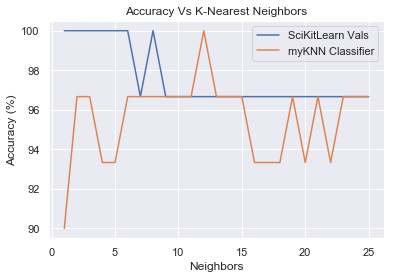

In [46]:
import matplotlib.pyplot as plt
x_axis = [i for i in range(1,26)]

# Plotting the SciKitLearn Values
plt.plot(x_axis,predictions, label = "SciKitLearn Vals")

# Plotting my KNN model
plt.plot(x_axis,vals, label = "myKNN Classifier")
#predictions
#len(vals)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Vs K-Nearest Neighbors')
plt.legend()
plt.show()

The best K value for both models in my opinion was with k being 10. After looking at the graph, it confirmed my expectations that I expected the results of accuracy to be almost the same or similar because I developed the myKNN model similar to how it was implemented in the SciKitLearn package. I picked 10 as the best value, because it is one they both produced the same value, and also having a value of 100% when predicting on a train set would show signs of overfitting, so to avoid that, I felt like this was the best value for k to be. Also, if K is too high of a number, the cost of running it would be more, and would be less efficient.

e) (6 pts) Implement Linear Discriminant Analysis (call it `myLDA`) for each pair of the classes and report your results.

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import *
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [48]:
sc = StandardScaler()
encoder_iris = LabelEncoder()

df_iris = pd.read_csv('iris.data',header=None)
df_iris.columns = ['sepal length', 'sepal width', 'petal height', 'petal width', 'flower type']
#print(df_iris)
all_flowers = {}
count = 0
for i in pd.unique(df_iris['flower type']):
    all_flowers[i] = count
    count += 1
for i in range(len(iris['flower type'])):
    df_iris['flower type'][i] = all_flowers[df_iris['flower type'][i]]
    
X_vals = df_iris.iloc[:,:4]
Y_vals = df_iris['flower type']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_vals,Y_vals,test_size=0.2,random_state=0)

In [50]:
# Iterating through each x_column, and normalizing and transforming it (i.e. pre-processing)
# Can also use pandas getDummies
for i in x_train.columns:
    x_train[i] = sc.fit_transform(x_train[i].values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [51]:
mu = np.mean(x_train,axis=0).values.reshape(4,1) 

means = []


for value in np.unique(Y_vals):
    means.append(np.mean(x_train.where(Y_vals==value),axis=0))

mu_k = np.array(means).T


dot_prods = []
sums = []

counter = 0

for uniques in np.unique(Y_vals):
    a = np.array(x_train.where(Y_vals==uniques).dropna().values-mu_k[:,counter].reshape(1,4))
    dot_prods.append(np.dot(a.T,a))
    sums.append(np.sum(Y_vals==uniques))
    counter += 1
    
SW = np.sum(dot_prods,axis=0)

SB = np.dot(sums*np.array(mu_k-mu),np.array(mu_k-mu).T)


(eigvalues, eigvectors) = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


In [52]:
eigens = [[np.abs(eigvalues[i]),eigvectors[:,i]] for i in range(len(eigvalues))]
eigens = sorted(eigens,key=lambda k: k[0],reverse=True)
w = np.hstack((eigens[0][1][:,np.newaxis].real,eigens[1][1][:,np.newaxis].real))


Y_pred = x_train.dot(w)

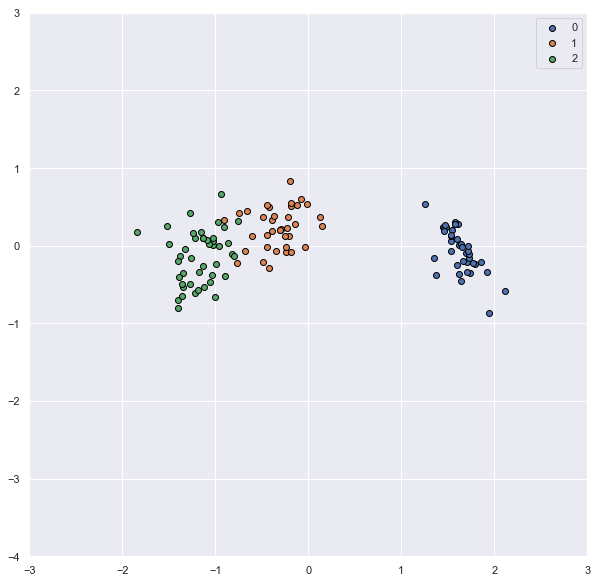

In [53]:
# The Belog graph is the graph to classify each of the points in their respective section.
figure = plt.figure(figsize=(10,10))
ax0 = figure.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l in np.unique(y_train):
    ax0.scatter(Y_pred[0][y_train==l],Y_pred[1][y_train==l], label=l,edgecolors='black')
ax0.legend()



### Problem 3 - Logistic Regression (Lecture 4)
(8 pts) In this problem you are going to built a logistic regression, `myLogistic`. The confirmation of the function will be done in HW#3. 
Here is a brief pseudo code. 

a. Initialize the weight and bias.

b. A sigmoid function

c. Forward/backward Propagation functions $𝑧=𝑥_1𝑤_1+\cdots+𝑥_n𝑤_n+𝑏$

d. Updating Parameters Function

e. Prediction Function

f. Main Function - Logistic Regression

g. Calculate the accuracy

In [741]:
### Code Starts Here ###
### Code Starts Here ###

# Part A
def weightBiasInitialization(features):
    weight = np.zeros((1,features))
    bias = 0
    return weight,bias

# Part B
def sigmoid(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

# Part C
def forwardPropagationFunction(w, b, X, Y):
    final_result = sigmoid(np.dot(w, X.T) + b)
    Y_T = Y.T
    cost = (-1 / len(Y))*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    return cost

# Part D
def backwardPropagationFunction(w, b, X, Y, learning_rate, price):
    prices = price
    while prices > price:
        #
        prices = forwardPropagationFunction(w,b,X,Y)
        #
        sig = sigmoid(np.dot(w,X.T)+b)
        dw = 1/len(Y)*(np.dot(X.T, (sig-Y.T).T))
        db = (1/len(Y))*(np.sum(sig-Y.T))
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
    return w, b

# Part E
def prediction(w, b, y_predict):
    return w * y_predict.T + b

# Part F
def mainFunction(X, Y, learning_rate, price, final_train, final_test):
    w, b = nullInitialization(len(X))
    w, b = backwardsPropagation(w, b, X, Y, learning_rate, price)
    predict_test = prediction(w, b, final_train)
    return w, b, predict_test

# Part G
def Accuracy(predict_test, final_test, a):
    count = 0
    for x, y in predict_test, final_test:
        if x - y < a:
            count += 1
        else:
            count += 1
    return count